In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [2]:
data = pd.read_csv('Truck_sales.csv', usecols=[0,1])
data_array = data.to_numpy().flatten()
print(data)

    Year-Month  Number_Trucks_Sold
0       03-Jan                 155
1       03-Feb                 173
2       03-Mar                 204
3       03-Apr                 219
4       03-May                 223
..         ...                 ...
139     14-Aug                 933
140     14-Sep                 704
141     14-Oct                 639
142     14-Nov                 571
143     14-Dec                 666

[144 rows x 2 columns]


In [3]:
data['Year-Month'] = '20' + data['Year-Month']
data['Year-Month'] = pd.to_datetime(data['Year-Month'], format='%Y-%b')
print(data)

    Year-Month  Number_Trucks_Sold
0   2003-01-01                 155
1   2003-02-01                 173
2   2003-03-01                 204
3   2003-04-01                 219
4   2003-05-01                 223
..         ...                 ...
139 2014-08-01                 933
140 2014-09-01                 704
141 2014-10-01                 639
142 2014-11-01                 571
143 2014-12-01                 666

[144 rows x 2 columns]


In [4]:
series = data.set_index('Year-Month')
series = series['Number_Trucks_Sold']
print(series)

Year-Month
2003-01-01    155
2003-02-01    173
2003-03-01    204
2003-04-01    219
2003-05-01    223
             ... 
2014-08-01    933
2014-09-01    704
2014-10-01    639
2014-11-01    571
2014-12-01    666
Name: Number_Trucks_Sold, Length: 144, dtype: int64


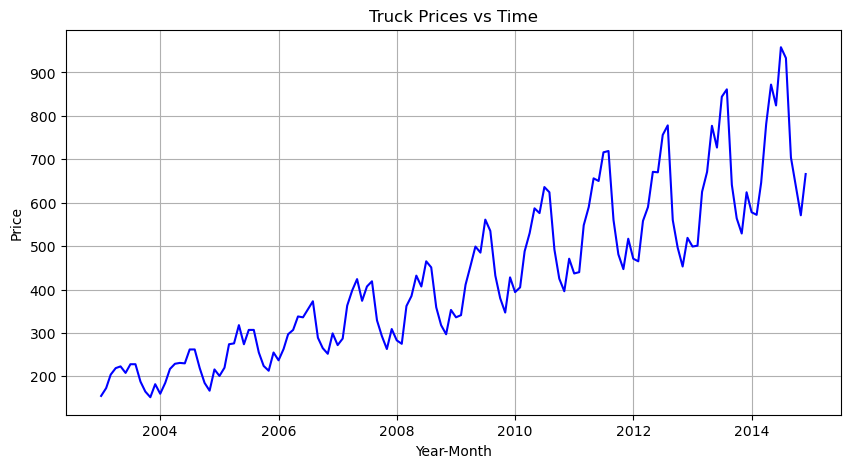

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(series, color='blue', label='Truck Prices')
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Truck Prices vs Time')
plt.grid(True)
plt.show()

In [6]:
data_train = series[:'2014-01-01'].to_numpy()
data_test = series['2013-01-01':].to_numpy()

In [7]:
window_size = 12

X_train = []
y_train = []
for i in range(len(data_train) - window_size):
    X_train.append(data_train[i: i + window_size])
    y_train.append(data_train[i+window_size])

X_test = []
y_test = []
for i in range(len(data_test) - window_size):
    X_test.append(data_test[i: i + window_size])
    y_test.append(data_test[i+window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [8]:
print('X_train: ', X_train)
print('y_train: ', y_train)

X_train:  [[155 173 204 ... 165 152 182]
 [173 204 219 ... 152 182 160]
 [204 219 223 ... 182 160 185]
 ...
 [453 519 499 ... 861 641 564]
 [519 499 501 ... 641 564 529]
 [499 501 625 ... 564 529 624]]
y_train:  [160 185 217 229 231 230 262 262 219 185 167 216 201 220 274 276 318 274
 307 307 255 224 213 255 237 263 297 307 338 336 354 373 289 265 252 299
 272 287 363 398 424 374 407 419 329 293 263 309 283 275 362 385 432 407
 465 451 359 318 297 353 336 341 411 455 499 485 561 535 432 380 347 428
 394 405 488 530 587 576 636 624 492 425 396 471 437 440 548 590 656 650
 716 719 560 481 447 517 471 465 558 590 671 670 756 778 560 497 453 519
 499 501 625 671 777 727 844 861 641 564 529 624 578]


In [9]:
print('X_test: ', X_test)
print('y_test: ', y_test)

X_test:  [[499 501 625 671 777 727 844 861 641 564 529 624]
 [501 625 671 777 727 844 861 641 564 529 624 578]
 [625 671 777 727 844 861 641 564 529 624 578 572]
 [671 777 727 844 861 641 564 529 624 578 572 646]
 [777 727 844 861 641 564 529 624 578 572 646 781]
 [727 844 861 641 564 529 624 578 572 646 781 872]
 [844 861 641 564 529 624 578 572 646 781 872 824]
 [861 641 564 529 624 578 572 646 781 872 824 958]
 [641 564 529 624 578 572 646 781 872 824 958 933]
 [564 529 624 578 572 646 781 872 824 958 933 704]
 [529 624 578 572 646 781 872 824 958 933 704 639]
 [624 578 572 646 781 872 824 958 933 704 639 571]]
y_test:  [578 572 646 781 872 824 958 933 704 639 571 666]


In [10]:
# model = Sequential()
# model.add(SimpleRNN(50, activation='relu', input_shape=(window_size, 1)))
# model.add(Dense(1))

model = Sequential()
model.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
model.add(SimpleRNN(64, activation='relu', return_sequences=True))
model.add(SimpleRNN(64, activation='relu'))
model.add(Dense(1))

In [11]:
model.compile(loss='mse', optimizer='adam')
model.fit(np.array(X_train), np.array(y_train), epochs=500, verbose=1)

Epoch 1/5000
4/4 [==============================] - 1s 4ms/step - loss: 112276.8828
Epoch 2/5000
4/4 [==============================] - 0s 3ms/step - loss: 24051.1855
Epoch 3/5000
4/4 [==============================] - 0s 3ms/step - loss: 10040.8525
Epoch 4/5000
4/4 [==============================] - 0s 3ms/step - loss: 11693.4658
Epoch 5/5000
4/4 [==============================] - 0s 3ms/step - loss: 7692.6675
Epoch 6/5000
4/4 [==============================] - 0s 3ms/step - loss: 6068.9141
Epoch 7/5000
4/4 [==============================] - 0s 3ms/step - loss: 4477.9268
Epoch 8/5000
4/4 [==============================] - 0s 3ms/step - loss: 3436.1824
Epoch 9/5000
4/4 [==============================] - 0s 3ms/step - loss: 2316.6997
Epoch 10/5000
4/4 [==============================] - 0s 3ms/step - loss: 2286.3413
Epoch 11/5000
4/4 [==============================] - 0s 3ms/step - loss: 2221.4810
Epoch 12/5000
4/4 [==============================] - 0s 3ms/step - loss: 1853.7888
Epoch 13

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 12, 64)            4224      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 12, 64)            8256      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 20801 (81.25 KB)
Trainable params: 20801 (81.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
results = model.predict(np.array(X_test))

1/1 [==============================] - 0s 226ms/step


In [14]:
print(results)

[[579.41437]
 [552.61053]
 [702.19366]
 [711.17474]
 [844.14514]
 [816.2515 ]
 [969.67065]
 [972.84064]
 [788.9594 ]
 [610.45355]
 [568.2342 ]
 [672.8206 ]]


In [15]:
print(y_test)

[578 572 646 781 872 824 958 933 704 639 571 666]


In [16]:
pred_series = series.copy()['2014-01-01':]
for i in range(len(pred_series)):
    pred_series.iloc[i] = results[i]
print(pred_series)

Year-Month
2014-01-01    579.414368
2014-02-01    552.610535
2014-03-01    702.193665
2014-04-01    711.174744
2014-05-01    844.145142
2014-06-01    816.251526
2014-07-01    969.670654
2014-08-01    972.840637
2014-09-01    788.959412
2014-10-01    610.453552
2014-11-01    568.234192
2014-12-01    672.820618
Name: Number_Trucks_Sold, dtype: float64


C:\Users\jessi\AppData\Local\Temp\ipykernel_42000\161005295.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[579.41437]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pred_series.iloc[i] = results[i]


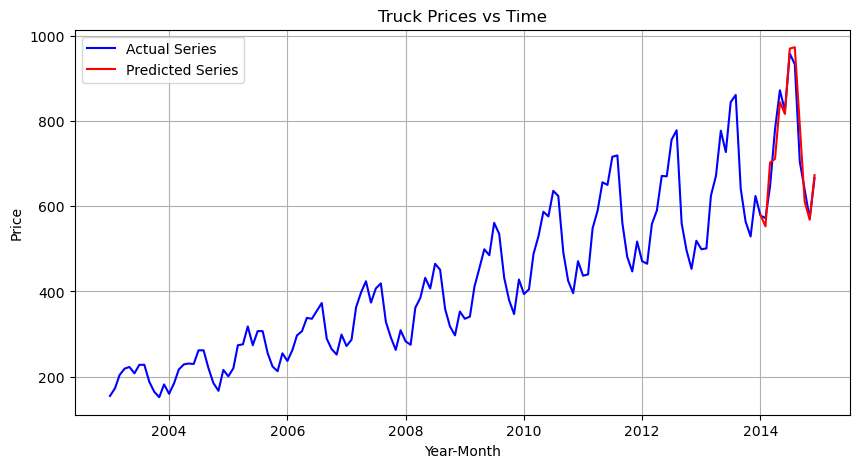

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(series, color='blue', label='Actual Series')
plt.plot(pred_series, color='red', label='Predicted Series')
plt.legend()
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Truck Prices vs Time')
plt.grid(True)
plt.show()